In [59]:
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt

retail_df = pd.read_excel('online_retail.xlsx')
retail_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [60]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [61]:
retail_df = retail_df[retail_df['Quantity'] > 0]
retail_df = retail_df[retail_df['Price'] > 0]
retail_df = retail_df[retail_df['Customer ID'].notnull()]

print(retail_df.shape)
retail_df.isnull().sum()

(407664, 8)


Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [62]:
retail_df['Country'].value_counts().head()

United Kingdom    370929
EIRE                8507
Germany             7654
France              5470
Netherlands         2729
Name: Country, dtype: int64

In [63]:
retail_df = retail_df[retail_df['Country'] == 'United Kingdom']
print(retail_df.shape)

(370929, 8)


In [64]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370929 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      370929 non-null  object        
 1   StockCode    370929 non-null  object        
 2   Description  370929 non-null  object        
 3   Quantity     370929 non-null  int64         
 4   InvoiceDate  370929 non-null  datetime64[ns]
 5   Price        370929 non-null  float64       
 6   Customer ID  370929 non-null  float64       
 7   Country      370929 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 25.5+ MB


In [65]:
retail_df['sale_amount'] = retail_df['Quantity'] * retail_df['Price']
retail_df['Customer ID'] = retail_df['Customer ID'].astype(int)
print(retail_df['Customer ID'].value_counts().head())
print(retail_df.groupby('Customer ID')['sale_amount'].sum().sort_values(ascending=False)[:5])

17841    5043
14606    3866
12748    2633
17850    2499
16549    2269
Name: Customer ID, dtype: int64
Customer ID
18102    349164.35
13694    131443.19
17511     84541.17
15061     83284.38
16684     80489.21
Name: sale_amount, dtype: float64


In [66]:
retail_df.groupby(['Invoice', 'StockCode'])['Invoice'].count().mean()

1.0351343281082996

In [67]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370929 entries, 0 to 525460
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      370929 non-null  object        
 1   StockCode    370929 non-null  object        
 2   Description  370929 non-null  object        
 3   Quantity     370929 non-null  int64         
 4   InvoiceDate  370929 non-null  datetime64[ns]
 5   Price        370929 non-null  float64       
 6   Customer ID  370929 non-null  int64         
 7   Country      370929 non-null  object        
 8   sale_amount  370929 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 28.3+ MB


In [68]:
aggregations = {
    'InvoiceDate': 'max',
    'Invoice': 'count',
    'sale_amount': 'sum'
}

cust_df = retail_df.groupby('Customer ID').agg(aggregations)
cust_df = cust_df.rename(columns={'InvoiceDate': 'Recency', 'Invoice': 'Frequency', 'sale_amount': 'Monetary'})

cust_df = cust_df.reset_index()
cust_df.head()

,Customer ID,Recency,Frequency,Monetary
0,12346,2010-06-28 13:53:00,33,372.86
1,12608,2010-10-31 10:49:00,16,415.79
2,12745,2010-08-10 10:14:00,22,723.85
3,12746,2010-06-17 10:41:00,17,254.55
4,12747,2010-12-05 15:38:00,154,5080.53


In [69]:
import datetime as dt

cust_df['Recency'] = dt.datetime(2010, 12, 10) - cust_df['Recency']
cust_df['Recency'] = cust_df['Recency'].apply(lambda x: x.days+1)
print('cust_df.shape: ', cust_df.shape)
cust_df.head()

cust_df.sort_values(by='Recency', ascending=False)

cust_df.shape:  (3969, 4)


,Customer ID,Recency,Frequency,Monetary
1325,14654,374,27,246.86
3058,17056,374,8,128.60
3464,17592,374,13,148.30
506,13526,374,44,1182.00
2844,16763,374,21,352.85
...,...,...,...,...
3520,17671,1,39,830.63
2482,16255,1,265,2286.89
1637,15079,1,98,2871.74
308,13230,1,728,3553.81


(array([3.952e+03, 1.200e+01, 3.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([2.9500000e+00, 3.4919090e+04, 6.9835230e+04, 1.0475137e+05,
        1.3966751e+05, 1.7458365e+05, 2.0949979e+05, 2.4441593e+05,
        2.7933207e+05, 3.1424821e+05, 3.4916435e+05]),
 <BarContainer object of 10 artists>)

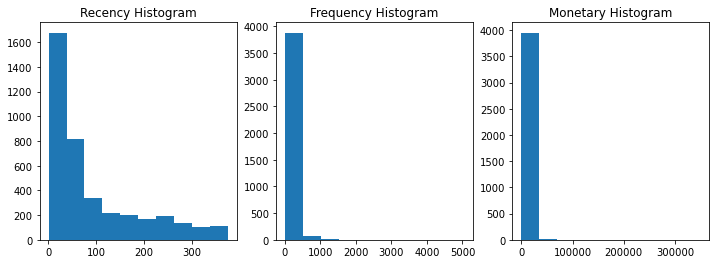

In [71]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(12, 4), nrows=1, ncols=3)

ax1.set_title('Recency Histogram')
ax1.hist(cust_df['Recency'])

ax2.set_title('Frequency Histogram')
ax2.hist(cust_df['Frequency'])

ax3.set_title('Monetary Histogram')
ax3.hist(cust_df['Monetary'])

In [75]:
cust_df[['Recency', 'Frequency', 'Monetary']].describe()

,Recency,Frequency,Monetary
count,3969.000000,3969.000000,3969.000000
mean,91.095742,93.456538,1868.167287
std,97.072657,183.306124,7380.830030
min,1.000000,1.000000,2.950000
25%,18.000000,18.000000,304.200000
50%,52.000000,43.000000,669.910000
75%,136.000000,102.000000,1655.640000
max,374.000000,5043.000000,349164.350000


In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

X_features = cust_df[['Recency', 'Frequency', 'Monetary']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

print('silhouette_score(X_features_scaled, labels):', silhouette_score(X_features_scaled, labels))

silhouette_score(X_features_scaled, labels): 0.5748598195620693


In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

cust_df['Recency_log'] = np.log1p(cust_df['Recency'])
cust_df['Frequency_log'] = np.log1p(cust_df['Frequency'])
cust_df['Monetary_log'] = np.log1p(cust_df['Monetary'])

X_features = cust_df[['Recency_log', 'Frequency_log', 'Monetary_log']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)

cust_df['cluster_label'] = labels

print(silhouette_score(X_features_scaled, labels))

0.29576843794434327
